# 1. CARREGANDO ARQUIVOS
Importando bibliotecas 

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importando arquivos

In [22]:
df1= pd.read_csv("./listings_cleaned.csv", sep=",", header=0)

In [23]:
df2= pd.read_csv("./reviews.csv", sep=",", header=0)

# 2. EXPLORANDO O DATAFRAME

Verificando as informações para o merge.

In [43]:
df1

,id,neighbourhood_cleansed,room_type,accommodates,price
0,271975,Vidigal,Entire home/apt,4,236.0
1,272335,Copacabana,Entire home/apt,4,723.0
2,272631,Copacabana,Private room,2,1146.0
3,273261,Leblon,Entire home/apt,6,6742.0
4,273363,Santa Teresa,Private room,1,61.0
...,...,...,...,...,...
39494,1319593870376466401,Copacabana,Entire home/apt,4,957.0
39495,1319611826461021550,Jacarezinho,Entire home/apt,8,288.0
39496,1319620401959854025,Copacabana,Entire home/apt,6,672.0
39497,1319650312466603776,Ipanema,Entire home/apt,6,1083.0


In [44]:
df2

,id,number_of_reviews,review_scores_rating
0,272335,367,4.920000
1,272631,32,5.000000
2,273363,5,5.000000
3,273463,654,4.830000
4,273496,60,4.800000
...,...,...,...
32690,842292,68,4.760000
32691,730997,119,4.760000
32692,857217,0,4.812309
32693,749237,53,4.810000


In [45]:
df1.shape

(39499, 5)

In [46]:
df2.shape

(32695, 3)

In [47]:
df1.isnull().sum()

id                           0
neighbourhood_cleansed       0
room_type                    0
accommodates                 0
price                     2855
dtype: int64

In [48]:
df1.drop(['bathrooms', 'bedrooms', 'beds'], axis=1, inplace=True)

KeyError: "['bathrooms', 'bedrooms', 'beds'] not found in axis"

In [ ]:
df2.isnull().sum()

id                      0
number_of_reviews       0
review_scores_rating    0
dtype: int64

Aparentemente, o segundo dataframe tem menos informações, pois nem todos quartos receberam reviews e possivelmente estes não foram incluídos no segundo data frame com valores de reviews nulos. Então o merge será feito com base nesta informação.

In [ ]:
dfmain = pd.merge(df1, df2, how='left', on=['id'])

In [ ]:
dfmain.head(8)

,id,neighbourhood_cleansed,room_type,accommodates,price,number_of_reviews,review_scores_rating
0,271975,Vidigal,Entire home/apt,4,236.0,NaN,NaN
1,272335,Copacabana,Entire home/apt,4,723.0,367.0,4.920000
2,272631,Copacabana,Private room,2,1146.0,32.0,5.000000
3,273261,Leblon,Entire home/apt,6,6742.0,0.0,4.812309
4,273363,Santa Teresa,Private room,1,61.0,5.0,5.000000
5,273463,Lagoa,Entire home/apt,6,1411.0,654.0,4.830000
6,273496,Leblon,Entire home/apt,6,703.0,60.0,4.800000
7,273753,Santa Teresa,Private room,1,59.0,4.0,4.500000


In [ ]:
dfmain.shape

(39499, 7)

Observando se os valores nulos de ambas colunas que contém este meliante (valores vazios), possuem a mesma quantidade de linhas.

In [ ]:
dfmain[dfmain['number_of_reviews'].isnull()]

,id,neighbourhood_cleansed,room_type,accommodates,price,number_of_reviews,review_scores_rating
0,271975,Vidigal,Entire home/apt,4,236.0,NaN,NaN
14,48901,Copacabana,Entire home/apt,11,NaN,NaN,NaN
18,278745,Ipanema,Entire home/apt,5,5394.0,NaN,NaN
19,280625,Botafogo,Private room,3,377.0,NaN,NaN
23,282071,Flamengo,Entire home/apt,2,438.0,NaN,NaN
...,...,...,...,...,...,...,...
39464,1319098256127948541,Copacabana,Entire home/apt,7,3214.0,NaN,NaN
39477,1319505930858342161,Glória,Entire home/apt,4,1057.0,NaN,NaN
39480,1319513224061078191,Joá,Entire home/apt,12,14950.0,NaN,NaN
39482,1319533235891441001,Copacabana,Private room,2,609.0,NaN,NaN


In [ ]:
dfmain[dfmain['review_scores_rating'].isnull()]

,id,neighbourhood_cleansed,room_type,accommodates,price,number_of_reviews,review_scores_rating
0,271975,Vidigal,Entire home/apt,4,236.0,NaN,NaN
14,48901,Copacabana,Entire home/apt,11,NaN,NaN,NaN
18,278745,Ipanema,Entire home/apt,5,5394.0,NaN,NaN
19,280625,Botafogo,Private room,3,377.0,NaN,NaN
23,282071,Flamengo,Entire home/apt,2,438.0,NaN,NaN
...,...,...,...,...,...,...,...
39464,1319098256127948541,Copacabana,Entire home/apt,7,3214.0,NaN,NaN
39477,1319505930858342161,Glória,Entire home/apt,4,1057.0,NaN,NaN
39480,1319513224061078191,Joá,Entire home/apt,12,14950.0,NaN,NaN
39482,1319533235891441001,Copacabana,Private room,2,609.0,NaN,NaN


Aqui comecei o data cleaning. O meu problema inicial aqui foi que, se eu apagar as linhas que tenham colunas vazias, não conseguiria fazer uma analise como "Média do preço de um imóvel em Copacabana" pois enviezaria minha análise, já que quase 7 mil linhas é um valor razoável de influência. Porém, para fazer a média de reviews por exemplo, os valores nulos atrapalhariam por sua vez se o banco não tivesse providenciado a média de rating. Poderia fazer uma média para preencher os valores nulos, mas minha abordagem daqui pra frente dependeria das perguntas de negócio que fossem solicitadas, ou das perguntas que gostaria de responder e criar uma analise robusta. Em uma situação hipotética, onde eu não teria quais perguntas o cliente quer realizar, farei ambos os métodos, armazenando em variáveis diferentes para trabalhar com o que mais seja conveniente no futuro diante das propostas que podem surgir. Pode ser que acabe por ignorar um dos caminhos, mas ter os dois disponíveis me deixa mais confortável.

In [ ]:
dfmain_sem_nulos = dfmain.dropna(subset=['number_of_reviews', 'review_scores_rating'])

Interessante aqui é que, ao remover os valores nulos das colunas de rating e reviews, a coluna preço se acertou também. Mas, nem tudo é pêra com chocolate, dos 39499 valores originais, restou 32695 que dá cerca de uns 17% de perca, o que dá uma possibilidade razoável de surgir analises inviezadas.

In [ ]:
dfmain_sem_nulos.isnull().sum()

id                        0
neighbourhood_cleansed    0
room_type                 0
accommodates              0
price                     0
number_of_reviews         0
review_scores_rating      0
dtype: int64

In [ ]:
dfmain_sem_nulos.shape

(32695, 7)

In [ ]:
dfmain['number_of_reviews'] = dfmain['number_of_reviews'].fillna(dfmain['number_of_reviews'].mean())

In [49]:
dfmain['price'] = dfmain['price'].fillna(dfmain['price'].mean())

In [51]:
dfmain['review_scores_rating'] = dfmain['review_scores_rating'].fillna(dfmain['review_scores_rating'].mean())

In [52]:
dfmain.isnull().sum()


id                        0
neighbourhood_cleansed    0
room_type                 0
accommodates              0
price                     0
number_of_reviews         0
review_scores_rating      0
dtype: int64

In [53]:
dfmain.head(8)

,id,neighbourhood_cleansed,room_type,accommodates,price,number_of_reviews,review_scores_rating
0,271975,Vidigal,Entire home/apt,4,236.0,24.1321,4.816146
1,272335,Copacabana,Entire home/apt,4,723.0,367.0000,4.920000
2,272631,Copacabana,Private room,2,1146.0,32.0000,5.000000
3,273261,Leblon,Entire home/apt,6,6742.0,0.0000,4.812309
4,273363,Santa Teresa,Private room,1,61.0,5.0000,5.000000
5,273463,Lagoa,Entire home/apt,6,1411.0,654.0000,4.830000
6,273496,Leblon,Entire home/apt,6,703.0,60.0000,4.800000
7,273753,Santa Teresa,Private room,1,59.0,4.0000,4.500000


Comparando para se ter uma ideia da quantidade de dados de ambos

In [54]:
dfmain.shape

(39499, 7)

In [56]:
dfmain_sem_nulos.shape

(32695, 7)

# Iniciando trabalho com Outliers

<Axes: >

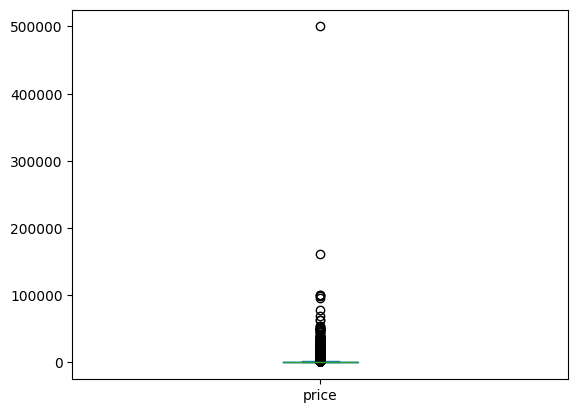

In [59]:
dfmain['price'].plot(kind="box")